# Fourier series - Buliding a waveform from harmonic waves

Any signal $x(t)$ over an interval $T_0$ can be written as a sum of complex exponentials where the frequencies $f_k$ are the harmonics of the fundamental $f_0$, i.e., $f_k= kf_0=k/T_0, k=0, 1, 2, \ldots$. The mathematical formulation of this is 
\begin{align}
	x(t) &= \sum_{k=0}^{+\infty} A_k \cos \left( 2\pi k f_ 0 t +\phi_k\right)  = \sum_{k=-\infty}^{+\infty} a_k e^{j2\pi k f_ 0 t } \quad , & f_0= \frac{1}{T_0} \:.
\end{align}
The amplitudes $A_k$ and phases $\phi_k$ of the cosine-waves are related to the Fourier coefficients $a_k$ by
\begin{align}
    a_0 &= A_0 \quad , \quad &     a_k &= \tfrac12 A_k e^{j\phi_k} \quad , \quad k \ne 0
\end{align}
For a real-valued signal, the Fourier coefficients $a_k$ show conjugate symmetry between the positive and negative $k$ values,
\begin{align}
    a_{-k} &= a_k^*  \quad , & |a_{-k}| &= |a_k| \quad , & \angle a_{-k} &= \angle a_k
\end{align}
Hence, the negative coefficients, $k<0$ have the same magnitude and opposite phase of the corresponding positive coefficients. 
The cosine-wave for frequency $f_k$ is the sum of the complex exponentials from the positive $a_k$ and negative coefficient $a_{-k}$,
\begin{align}
	a_k e^{j2\pi k f_ 0 t } + a_{-k} e^{-j2\pi k f_ 0 t }  
    &=  \tfrac12 A_k e^{j\phi k} a_k e^{j2\pi k f_ 0 t } + \tfrac12 A_k e^{-j\phi k} e^{-j2\pi k f_ 0 t } 
    =  \tfrac12 A_k \left( e^{j(2\pi k f_ 0 t +\phi_k)} + e^{j(-2\pi k f_ 0 t -\phi_k) } \right) \\
    &=  A_k \cos(2\pi k f_0 t +\phi_k)
\end{align}
where the last step follows from Euler's formula, $e^{x} + e^{-x} = 2 \cos x$.

The Fourier coefficients $a_k$, found by the following equation, shown in the textbook (McClellan et al., DSP First, 2016) 
\begin{align}
	a_k &= \frac{1}{T_0} \int_{0}^{T_0} x(t) e^{-j2\pi k f_0 t } dt 	\:.
\end{align}

## Square and Triangle Waves
 
Examples of three important signals shapes are the *square*, *triangular*, and *sawtooth* waves that can be selected in the program below. 
The Fourier coefficients for these can be calculated from the equations above, 
\begin{align}
	& \text{Square wave } & a_k&= \begin{cases}
		\frac{2}{j \pi k }	\qquad & k = \pm 1, \pm 3, \pm 5, \ldots \\
		0    					& k = 0, \pm 2, \pm 4, \pm 6, \ldots
	\end{cases}  \\ \\
	& \text{Triangle wave }  & a_k&= 
    \begin{cases}
    	\frac{4}{j \pi^2 k^2 }(-1)^{(k-1)/2}	& k = \pm 1, \pm 3, \pm 5, \ldots \\
    	0    					& k = 0, \pm 2, \pm 4, \pm 6, \ldots
    \end{cases} \\ \\
	& \text{Sawtooth wave }  & a_k&= 
    \begin{cases}
    	\frac{j}{\pi k }	& k = \pm 1, \pm 2, \pm 3, \pm 4, \ldots \\
    	0    					& k = 0
    \end{cases} 
\end{align}
Some observations that can be made from this are
  * The even components ($k=\pm2, \pm4 , \ldots$) vanish for the square and triangle waves, while they are present for the sawtooth. This comes out of  equations, but can also be seen from the symmetry of the waves. 

  * The coefficients for the square and sawtooth waves decrease as $1/k$, while the coefficients for the triangle wave decrease as $1/k^2$. The coefficients for the triangle wave decrease more rapidly than for the other two, and a good approximation for the triangle wave is obtained with fewer coefficients than for the others.

  * The phase of the coefficients depends on the starting point of the wave. The coefficients calculated above are for phase $\phi=0$ in the graphs below. If the waves are shifted along the time-axis, the phases will change while the magnitudes of the coefficients remain unaltered. 

      * The phase of the square wave coefficients are given by the factor $1/j = -j$, hence, the positive coeficients for the sqare wave have phase $-\tfrac\pi2$, while the negative coefficients have phase $+\tfrac\pi2$.
   
      * The phase of the triangle wave coefficients are given by the same factor $1/j$, multipliesd with the factor $(-1)^{(k-1)/2}$ that makes them change sign depending on $k$. This makes the phase of the triangle wave jump between $-\tfrac\pi2$ and $+\tfrac\pi2$.

      * The phase of the sawtooth wave coefficients are given by the factor $j$, hence, the positive coeficients have phase $\tfrac\pi2$ while the negative coeffients have phase $-\tfrac\pi2$.
   
## Illustration of Fourier Series
The widget below illustrates how the Fourier series works by buliding up a waveform from sine-waves. The shape of the signal (square, triangle etc.) can be selected, with parameters like phase and DC offset. The first Fourier coefficients $a_k$ are then calculated, for $k$ up to the specified number of coefficients.
* Upper left graph: Original signal
* Middle left graph: Sine-waves calculated from the Fourier coeffiients
* Lower left graph: Sum of the sine-waves above, in the middle left graph
* Two right graphs: Fourier coefficients, as magnitude and phase.

Test out different settings and notice how the original ssingna can be reconstructed as a sum of sine-waves. Notice in particular:
* How the symmetry of some signals require some coefficients to be zero. 
* How waveforms with sharp edges require many coefficients for a good reconstructions, while other waveforms can be reconstructed with only a few coefficients.
* The effect on the Fourier coefficients of cangning the DC offset or the phase
* The symmetry of the Fourier coefficients, in magnitude and phase





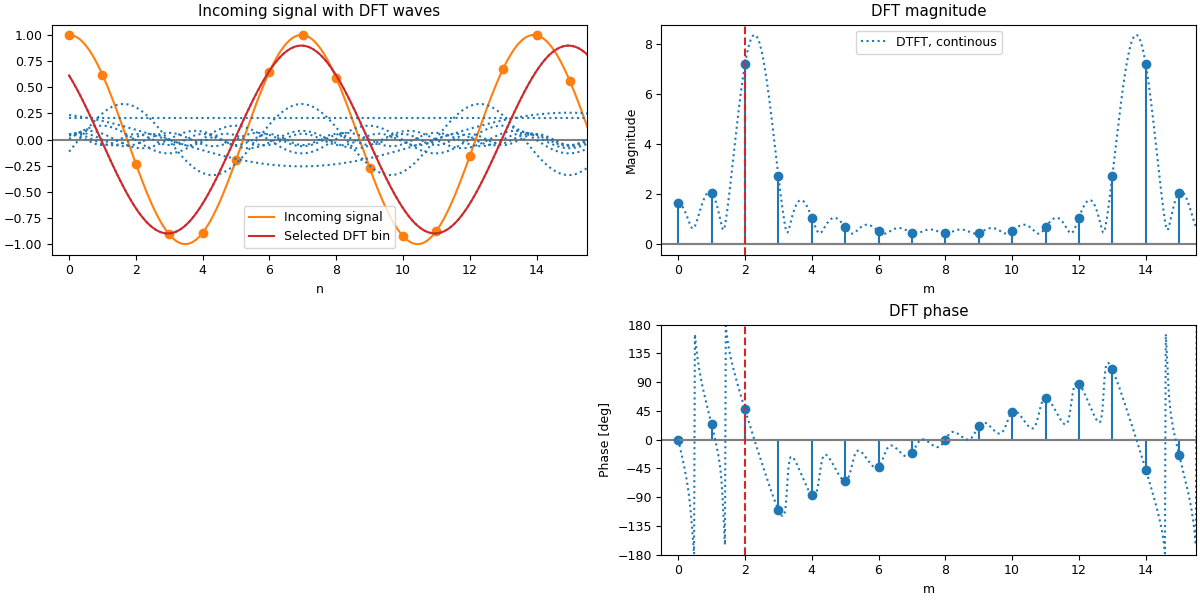

In [1]:
%matplotlib ipympl   
%load_ext autoreload
%autoreload 2
    
import ipywidgets
import dft_leakage

signal = dft_leakage.Signal(initialise_graphs=True, create_widgets=True)
display(signal.widget.layout)

res = ipywidgets.interactive(signal.interact, 
                             m = signal.widget.widget['m'], 
                             k = signal.widget.widget['k'])